# Setup

## Bibliotecas

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rc = {"font.family": "serif",  # fonte serifada
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dados
      "text.usetex": True,
      "axes.grid": True
      }

%matplotlib inline

plt.rcParams.update(rc)


## Funções

In [258]:
def regressao_polinomial(x, y, deg=1, return_all=False):
    """
    - Retorna: 
      coeficientes, polinomio, regressão | regressao
    """
    coeficientes = np.polyfit(x, y, deg=deg)
    polinomio = np.poly1d(coeficientes)
    regressao = polinomio(x)
    return [coeficientes, polinomio, regressao] if return_all else regressao


def add_c_grid(ax, a1=0.5, a2=0.5):
    ax.minorticks_on()
    ax.grid(which='major', alpha=a1)
    ax.grid(which='minor', alpha=a2)


def add_sci_limits(ax='both', limits=(0, 0)):
    plt.ticklabel_format(
        axis=ax,
        style='sci',
        useMathText=True,
        scilimits=limits)


def save_tab(tab, file, idx=True, header=True):
    tab.to_latex(
        buf=file,
        bold_rows=True,
        escape=False,
        index=idx,
        encoding='utf-8',
        header=header,
        column_format=len(tab.columns)*'c')


# Coleta de dados

## Parte 1

In [259]:
ctes = {
    'q1': -5e-6,
    'q2': 5e-6,
    'k0': 8.987552e9
}


In [260]:
tab_1 = pd.DataFrame({
    'r(cm)': np.arange(10.0, 2.0, -1.0)
})


In [261]:
tab_1['r2(m)'] = (tab_1['r(cm)'] / 100)**2
tab_1['1/r2(1/m)'] = 1/tab_1['r2(m)']


In [262]:

tab_1['FE(n)'] = [22.469, 27.739, 35.108,
                  45.855, 62.414, 89.876, 140.430, 249.564]


In [263]:
tab_1


,r(cm),r2(m),1/r2(1/m),FE(n)
0,10.0,0.0100,100.000000,22.469
1,9.0,0.0081,123.456790,27.739
2,8.0,0.0064,156.250000,35.108
3,7.0,0.0049,204.081633,45.855
4,6.0,0.0036,277.777778,62.414
5,5.0,0.0025,400.000000,89.876
6,4.0,0.0016,625.000000,140.430
7,3.0,0.0009,1111.111111,249.564


## Parte 2

In [264]:
ctes_2 = {
    'q1': 5e-6,
    'q2': 5e-6,
    'r': 0.06,
    'k0': 8.987552e9
}


In [265]:
tab_2 = pd.DataFrame({
    'q2': np.arange(10.0, 2.0, -1.0)
})


In [266]:
tab_2['FE(N)'] = [124.827, 112.344, 99.862,
                  87.379, 74.896, 62.414, 49.931, 37.448]


In [267]:
tab_2


,q2,FE(N)
0,10.0,124.827
1,9.0,112.344
2,8.0,99.862
3,7.0,87.379
4,6.0,74.896
5,5.0,62.414
6,4.0,49.931
7,3.0,37.448


# Análise dos resultados

## Parte 1

### Regressão linear manual

In [268]:
def reg_lin_manual(x, y, retorna_incerteza=False) -> list:
    '''
    Calcula os coeficientes da regressão linear calculada manualmente de x e y.

    # Retorna

    ## retorna_incerteza = False
     * [A, B, reg]

    ## retorna_incerteza = True
    * [A, B, reg, sigma_a, sigma_b]

    # Descrição do retorno:
    * A : Coeficiente linear
    * B: Coeficiente angular
    * reg: vetor de regeressão
    * sigma_a: incerteza de A
    * sigma_b: incerteza de B
    '''

    B = ((np.sum(x) * np.sum(y)) - (x.size * np.sum(x*y))) / \
        (np.sum(x)**2 - (x.size * np.sum(x**2)))

    A = (np.sum(y) - B * np.sum(x)) / (x.size)

    pol = np.poly1d([B, A])
    reg = pol(x)

    if retorna_incerteza:
        S = np.sum(np.power(y - reg, 2))
        den = (x.size * np.sum(x**2)) - (np.sum(x))**2

        sigma_a = S / ((x.size - 2) * np.sqrt(den))
        sigma_b = (S / (x.size - 2)) * np.sqrt(np.sum(x**2)/den)
        return [A, B, reg, sigma_a, sigma_b]

    return [A, B, reg]


In [269]:
tab_3 = pd.DataFrame({
    'xi': tab_1['1/r2(1/m)'],
    'yi': tab_1['FE(n)'],
    'xi*yi': tab_1['1/r2(1/m)'] * tab_1['FE(n)'],
    'xi^2': tab_1['1/r2(1/m)']**2
})

tab_3


,xi,yi,xi*yi,xi^2
0,100.000000,22.469,2246.900000,1.000000e+04
1,123.456790,27.739,3424.567901,1.524158e+04
2,156.250000,35.108,5485.625000,2.441406e+04
3,204.081633,45.855,9358.163265,4.164931e+04
4,277.777778,62.414,17337.222222,7.716049e+04
5,400.000000,89.876,35950.400000,1.600000e+05
6,625.000000,140.430,87768.750000,3.906250e+05
7,1111.111111,249.564,277293.333333,1.234568e+06


In [270]:
somas_tab3 = [tab_3[i].sum() for i in tab_3]

somas_tab3


[2997.6773116654067, 673.4550000000002, 438864.9617220962, 1953658.3493756545]

In [271]:
A, B, reg, sigma_a, sigma_b = reg_lin_manual(
    x=tab_1['1/r2(1/m)'], y=tab_1['FE(n)'], retorna_incerteza=True)

A, B, sigma_a, sigma_b


(0.018883231904169406,
 0.22460854326268434,
 1.1578828480107641e-07,
 0.0001618411402336728)

In [272]:
sigma_k0_1 = np.sqrt( (sigma_b**2) * (1/(5**2))**2 )
x = (sigma_b) * (1/(5**2))

sigma_k0_1, x

(6.473645609346912e-06, 6.4736456093469116e-06)

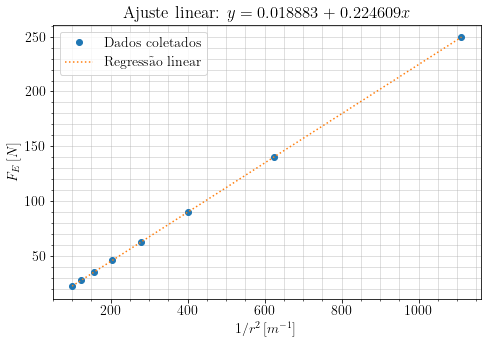

In [273]:
f, ax = plt.subplots(figsize=(7, 5))

ax.plot(tab_1['1/r2(1/m)'], tab_1['FE(n)'], 'o', label='Dados coletados')
ax.plot(tab_1['1/r2(1/m)'], reg, ':',  label='Regressão linear')

ax.set(
    title=f'Ajuste linear:  $y = {A:.6f} + {B:.6f}x$',
    # xticks=tab_1['1/r2(1/m)'],
    # yticks=tab_1['FE(n)']
    xlabel=r'$1/r^2\, [m^{-1}]$',
    ylabel=r'$F_E \, [N]$')

add_c_grid(ax=ax)

ax.legend()

f.tight_layout()

f.savefig('./fig1.pdf')

plt.show()


In [274]:
k0_exp = B/(5e-6**2)

k0_exp/1e9


8.984341730507373

In [275]:
ctes['k0']

8987552000.0

In [276]:
eta = abs(ctes['k0'] - k0_exp) / ctes['k0']

print(f'{eta*100:.6f}')


0.035719


In [277]:
tab_4 = pd.DataFrame({
    'yi':  tab_3['yi'],
    'A+Bxi': reg,
})


tab_4['yi - a+Bxi'] = tab_4['yi'] - tab_4['A+Bxi']
tab_4['yi - a+Bxi^2'] = tab_4['yi - a+Bxi']**2

tab_4


,yi,A+Bxi,yi - a+Bxi,yi - a+Bxi^2
0,22.469,22.479738,-0.010738,0.000115
1,27.739,27.748333,-0.009333,0.000087
2,35.108,35.113968,-0.005968,0.000036
3,45.855,45.857361,-0.002361,0.000006
4,62.414,62.410145,0.003855,0.000015
5,89.876,89.862301,0.013699,0.000188
6,140.430,140.399223,0.030777,0.000947
7,249.564,249.583931,-0.019931,0.000397


In [278]:
soma_tab_4 = tab_4['yi - a+Bxi^2'].sum()

soma_tab_4


0.0017906242183660238

## Parte 2

$$F_E = k_0 \frac{q_1 \cdot q_2}{r^2}$$

* $y = F_E$
* $x = q_2$
* $A = 0$
* $B = k_0\dfrac{q_1}{r^2}$

In [279]:
tab_2


,q2,FE(N)
0,10.0,124.827
1,9.0,112.344
2,8.0,99.862
3,7.0,87.379
4,6.0,74.896
5,5.0,62.414
6,4.0,49.931
7,3.0,37.448


In [280]:
tab_5 = pd.DataFrame({
    'xi': tab_2['q2'],
    'yi': tab_2['FE(N)'],
    'xi*yi': tab_2['q2'] * tab_2['FE(N)'],
    'xi^2': tab_2['q2']**2
})

tab_5


,xi,yi,xi*yi,xi^2
0,10.0,124.827,1248.270,100.0
1,9.0,112.344,1011.096,81.0
2,8.0,99.862,798.896,64.0
3,7.0,87.379,611.653,49.0
4,6.0,74.896,449.376,36.0
5,5.0,62.414,312.070,25.0
6,4.0,49.931,199.724,16.0
7,3.0,37.448,112.344,9.0


In [281]:
somas_tab5 = ([tab_5[i].sum() for i in tab_5])

somas_tab5


[52.0, 649.101, 4743.429, 380.0]

In [299]:
A, B, reg, sigma_a, sigma_b = reg_lin_manual(
    x=tab_2['q2'], y=tab_2['FE(N)'], retorna_incerteza=True)

A, B, sigma_a, sigma_b

(0.00021428571427861698,
 12.482678571428572,
 4.870935049961675e-09,
 9.495200439779647e-08)

In [302]:
sigma_k0_2 = np.sqrt(
    (sigma_b**2)*(60e-3**2/5)**2 + 
    (0.5e-3**2)*(2*B*60e-3/5)**2)

sigma_k0_2/1e-4


1.4979214285715845

In [284]:
k0_exp_2 = B*ctes_2['r']**2/(5e-6)/1000
k0_exp_2

8.987528571428571

In [285]:
k0_exp_2 = k0_exp_2*1e9

eta_2 =  abs(ctes['k0'] - k0_exp_2) / ctes['k0']
eta_2 

2.606780069622846e-06

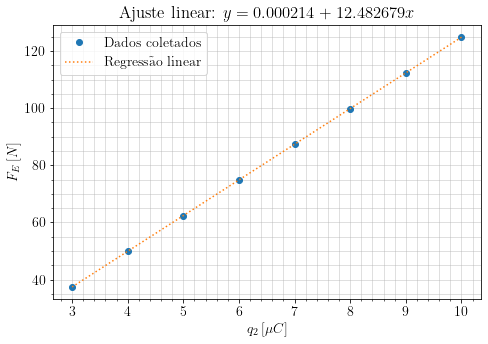

In [286]:
f, ax = plt.subplots(figsize=(7, 5))

ax.plot(tab_2['q2'], tab_2['FE(N)'], 'o', label='Dados coletados')
ax.plot(tab_2['q2'], reg, ':',  label='Regressão linear')

ax.set(
    title=f'Ajuste linear:  $y = {A:.6f} + {B:.6f}x$',
    xlabel=r'$q_2\, [\mu C]$',
    ylabel=r'$F_E \, [N]$')

add_c_grid(ax=ax)

ax.legend()

f.tight_layout()
f.savefig('./fig2.pdf')

plt.show()


In [287]:
k0_exp = B*((ctes_2['r']*1000)**2/ctes_2['q1'])

k0_exp*1e-9


8.987528571428573

In [288]:
eta = abs(ctes['k0'] - k0_exp) / ctes['k0']

print(eta*100)


0.0002606780069622846


In [289]:
tab_6 = pd.DataFrame({
    'yi':  tab_2['FE(N)'],
    'A+Bxi': reg,
})


tab_6['yi - a+Bxi'] = tab_6['yi'] - tab_6['A+Bxi']
tab_6['yi - a+Bxi^2'] = tab_6['yi - a+Bxi']**2

tab_6


,yi,A+Bxi,yi - a+Bxi,yi - a+Bxi^2
0,124.827,124.827000,0.000000,0.000000e+00
1,112.344,112.344321,-0.000321,1.033163e-07
2,99.862,99.861643,0.000357,1.275510e-07
3,87.379,87.378964,0.000036,1.275510e-09
4,74.896,74.896286,-0.000286,8.163265e-08
5,62.414,62.413607,0.000393,1.543367e-07
6,49.931,49.930929,0.000071,5.102041e-09
7,37.448,37.448250,-0.000250,6.250000e-08


In [290]:
soma_tab_6 = tab_6['yi - a+Bxi^2'].sum()

soma_tab_6


5.357142857199092e-07

# Para o relatório

In [291]:
tab_6


,yi,A+Bxi,yi - a+Bxi,yi - a+Bxi^2
0,124.827,124.827000,0.000000,0.000000e+00
1,112.344,112.344321,-0.000321,1.033163e-07
2,99.862,99.861643,0.000357,1.275510e-07
3,87.379,87.378964,0.000036,1.275510e-09
4,74.896,74.896286,-0.000286,8.163265e-08
5,62.414,62.413607,0.000393,1.543367e-07
6,49.931,49.930929,0.000071,5.102041e-09
7,37.448,37.448250,-0.000250,6.250000e-08


In [292]:
t1_latex = tab_1.rename({
    'r(cm)': r'$r \, [cm] $',
    'r2(m)': r'$r^2\, [m]$',
    '1/r2(1/m)': r'$1/r^2 \, [m^{-1}]$',
    'FE(n)': r'$F_E\, [N]$'
},
    axis=1, inplace=False)


In [293]:
t2_latex = tab_2.rename({
    'q2': r'$q_2$',
    'FE(N)': r'$F_E\, [N]$'
}, axis=1)


In [294]:
t3_latex = tab_3.rename({
    'xi': r'$x_i$',
    'yi': r'$y_i$',
    'xi*yi': r'$x_i \cdot y_i$',
    'xi^2': r'$x_i^2$'
}, axis=1)


In [295]:
t4_latex = tab_4.rename({
    'yi': r'$y_i$',
    'A+Bxi': r'$A+Bx_i$',
    'yi - a+Bxi': r'$y_i - A+Bx_i$',
    'yi - a+Bxi^2': r'$(y_i - A+Bx_i)^2$'
}, axis=1)


In [296]:
t5_latex = tab_5.rename({
    'xi': r'$x_i$',
    'yi': r'$y_i$',
    'xi*yi': r'$x_i \cdot y_i$',
    'xi^2': r'$x_i^2$'
}, axis=1)


In [297]:
t6_latex = tab_6.rename({
    'yi': r'$y_i$',
    'A+Bxi': r'$A+Bx_i$',
    'yi - a+Bxi': r'$y_i - A+Bx_i$',
    'yi - a+Bxi^2': r'$(y_i - A+Bx_i)^2$'
}, axis=1)


In [298]:
tabs_latex = [t1_latex, t2_latex, t3_latex, t4_latex, t5_latex, t6_latex]

for i in range(len(tabs_latex)):
    save_tab(tab=tabs_latex[i], idx=False, file=f'./tab_{i+1}.tex')


/tmp/ipykernel_10581/3837855752.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab.to_latex(
